In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.calibration import calibration_curve

In [2]:
csv_file_path = 'customer_booking - Clean.csv'

try:
    bookings = pd.read_csv(csv_file_path, encoding='latin-1')
    # Or use encoding='ISO-8859-1' or encoding='cp1252' if 'latin-1' doesn't work
    print("CSV file read successfully!")
except UnicodeDecodeError as e:
    print(f"Error: {e}")

CSV file read successfully!


In [3]:
bookings.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
bookings.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

### Random Tree classifier

In [6]:
# Split the data into features (X) and target variable (y)
X = bookings.drop('booking_complete', axis=1)  # Features
y = bookings['booking_complete']  # Target variable

In [7]:
# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Initialize a Random Forest classifier (you can choose a different classifier based on your requirements)
classifier = RandomForestClassifier()

In [10]:
# Train the model
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

In [12]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [13]:
# Display the evaluation metrics
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.8534
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.52      0.12      0.20      1480

    accuracy                           0.85     10000
   macro avg       0.69      0.55      0.56     10000
weighted avg       0.81      0.85      0.81     10000



### Logistic Regression

In [14]:
# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

C:\Users\kariu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
# Make predictions on the test set
y_pred = logreg_model.predict(X_test)
y_prob = logreg_model.predict_proba(X_test)[:, 1]  # Probability predictions for class 1

In [16]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

In [17]:
# Display the evaluation metrics
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)
print(f"ROC AUC Score: {roc_auc}")

Accuracy: 0.852
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.50      0.04      0.08      1480

    accuracy                           0.85     10000
   macro avg       0.68      0.52      0.50     10000
weighted avg       0.80      0.85      0.79     10000

ROC AUC Score: 0.7563683225479001


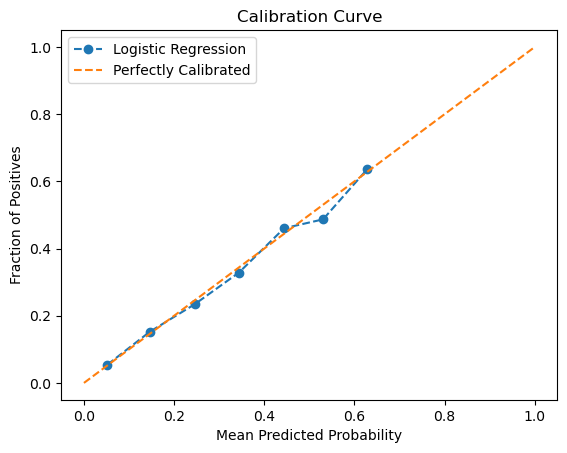

In [18]:
# Plot calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', linestyle='--', label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()

### Support Vector Machines (SVM)

In [19]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Hyperparameter Tuning with GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear'], 'gamma': ['scale', 'auto']}
grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_

In [ ]:
# Initialize and train the Support Vector Machine (SVM) model with the best parameters
svm_model = SVC(**best_params, probability=True)
svm_model.fit(X_train_scaled, y_train)

In [ ]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)
y_prob = svm_model.predict_proba(X_test_scaled)[:, 1]  # Probability predictions for class 1

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

In [ ]:
# Display the evaluation metrics
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)
print(f"ROC AUC Score: {roc_auc}")